# Date and Time Features

Date columns usually provide valuable information about the model target, they are neglected as an input or used nonsensically for the machine learning algorithms. It might be the reason for this, that dates can be present in numerous formats, which make it hard to understand by algorithms, even they are simplified to a format like "01–01–2017".

Building an ordinal relationship between the values is very challenging for a machine learning algorithm if you leave the date columns without manipulation. Here, I suggest three types of preprocessing for dates:

* Extract date components like day of week, day of year, hour, minute, seconds, quarter, day of month etc.
* Extract time-based features like evenings, noons, night time etc.
* Extract seasonal features like rainy season, dry Season, harmattan period, winter, summer, autumn.
* Place specific features like national holidays, religious breaks, festive periods etc.
* Calculate time elapsed between two related Date features. 

If you transform the date column into the extracted columns like above, the information of them become disclosed and machine learning algorithms can easily understand them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

In [2]:
df = pd.read_csv('../dastasets/ufo.csv')
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


**Time column datatype is object (string) so we want to cast it to datetime dtype to extract features from it, check pandas datetime functionalties.
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties<br><br>
and this is the date formats<br>
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior**

In [4]:
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M', errors="coerce")
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18216 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   15597 non-null  object        
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.7+ KB


**Ok the datatype of Time column is now datetime, so lets extract features.**

In [6]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Month_Name'] = df['Time'].dt.month_name()
df['Week'] = df['Time'].dt.week
df['Day'] = df['Time'].dt.day
df['Week_Day'] = df['Time'].dt.weekday
df['Day_Name'] = df['Time'].dt.day_name()
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,June,22,1,6,Sunday,22,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,June,27,30,0,Monday,20,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,February,7,15,6,Sunday,14,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,June,23,1,0,Monday,13,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,April,16,18,1,Tuesday,19,0


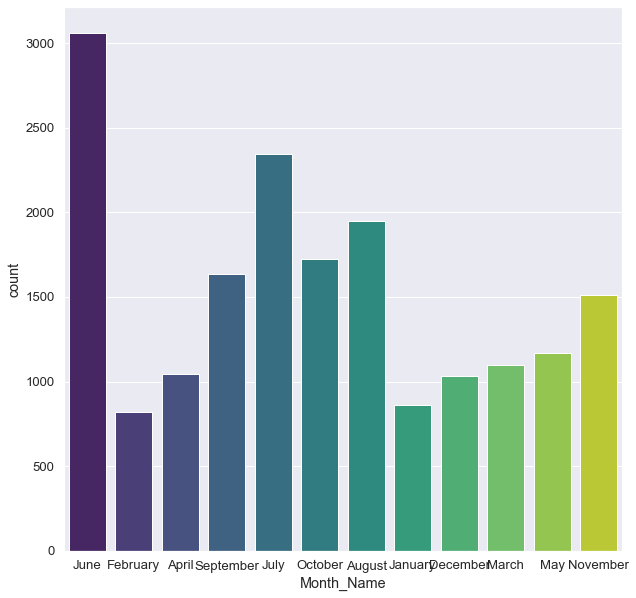

In [7]:
sns.countplot(x='Month_Name', data=df, palette='viridis')

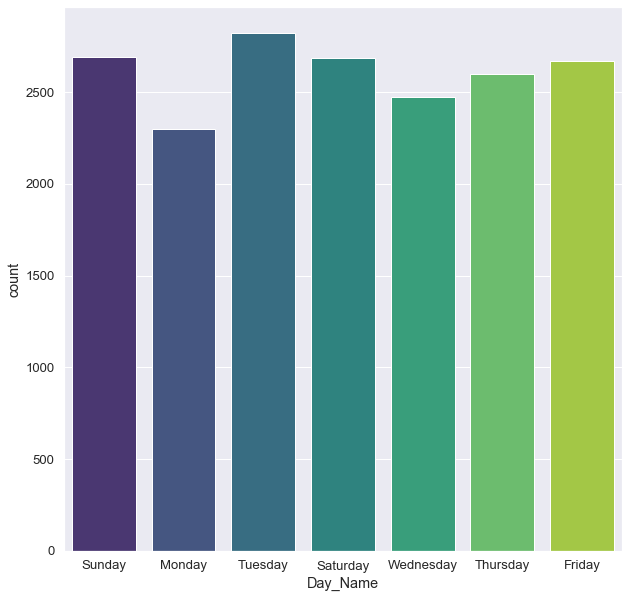

In [8]:
sns.countplot(x='Day_Name', data=df, palette='viridis')

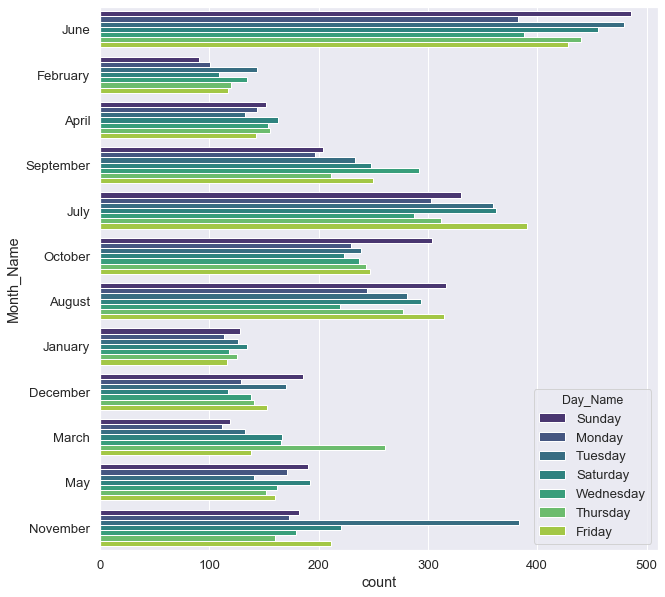

In [9]:
sns.countplot(y='Month_Name', data=df, palette='viridis', hue='Day_Name')

In [10]:
df.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,June,22,1,6,Sunday,22,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,June,27,30,0,Monday,20,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,February,7,15,6,Sunday,14,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,June,23,1,0,Monday,13,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,April,16,18,1,Tuesday,19,0


**Ok, Lets extract day periods from hours column**

In [11]:
def map_hours(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    else:
        return 'evening'
    
df['Period'] = df['Hour'].apply(map_hours)
df.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,June,22,1,6,Sunday,22,0,evening
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,June,27,30,0,Monday,20,0,evening
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,February,7,15,6,Sunday,14,0,afternoon
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,June,23,1,0,Monday,13,0,afternoon
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,April,16,18,1,Tuesday,19,0,evening


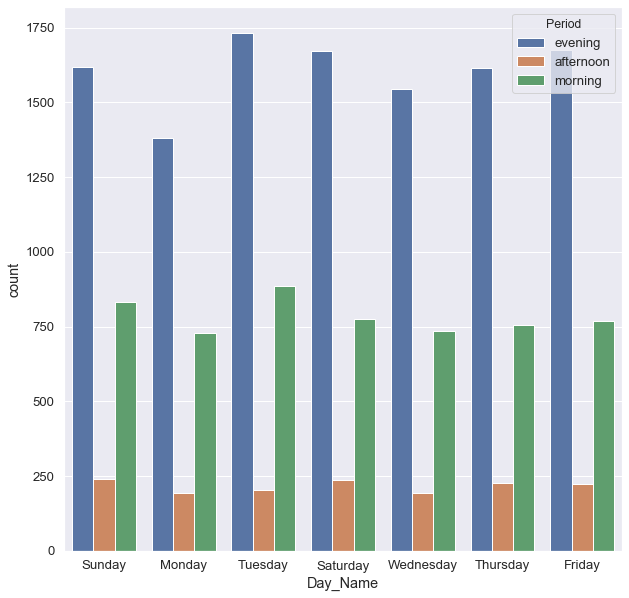

In [12]:
sns.countplot(x='Day_Name', hue='Period', data=df)

**Extract Season from month**

In [13]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)
df.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,June,22,1,6,Sunday,22,0,evening,Summer
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,June,27,30,0,Monday,20,0,evening,Summer
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,February,7,15,6,Sunday,14,0,afternoon,Winter
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,June,23,1,0,Monday,13,0,afternoon,Summer
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,April,16,18,1,Tuesday,19,0,evening,Spring


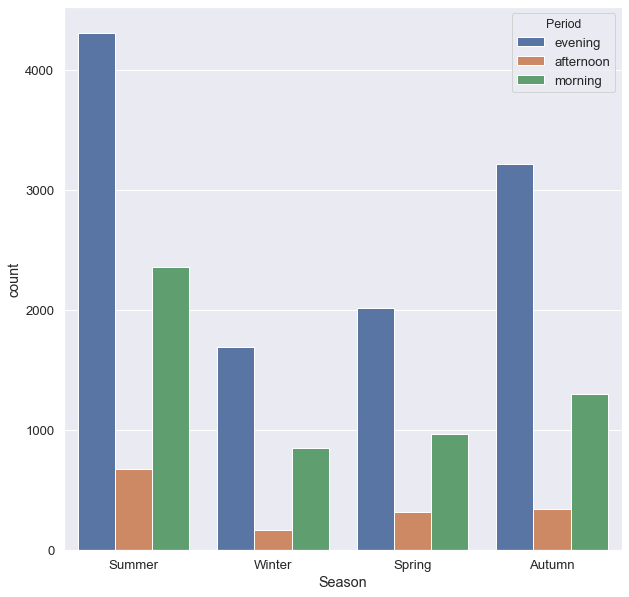

In [14]:
sns.countplot(x='Season', hue='Period', data=df)

**Calculate number of years elapsed from now**

In [15]:
from datetime import datetime

df['Elapsed_Years']  = (datetime.now() - df['Time']) / np.timedelta64(1, 'Y') # could be Y, M, D, W, h, m, s
df.head()

,City,Colors Reported,Shape Reported,State,Time,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute,Period,Season,Elapsed_Years
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,June,22,1,6,Sunday,22,0,evening,Summer,90.195574
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,June,27,30,0,Monday,20,0,evening,Summer,90.116403
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,February,7,15,6,Sunday,14,0,afternoon,Winter,89.487369
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,June,23,1,0,Monday,13,0,afternoon,Summer,89.197265
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,April,16,18,1,Tuesday,19,0,evening,Spring,87.315638


# Great Work!